In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# loading the image

def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

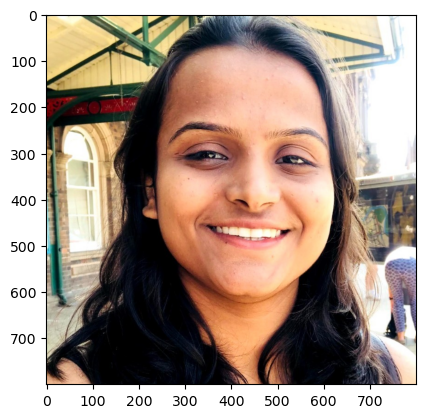

In [75]:
filename = "shivani.jpeg"
img = read_file(filename) 

org_img = np.copy(img)

# Create Edge Mask

In [76]:
def edge_mask(img, line_size, blur_value):
    """
    input : input image
    output: Edges of images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, line_size, blur_value )
    return edges

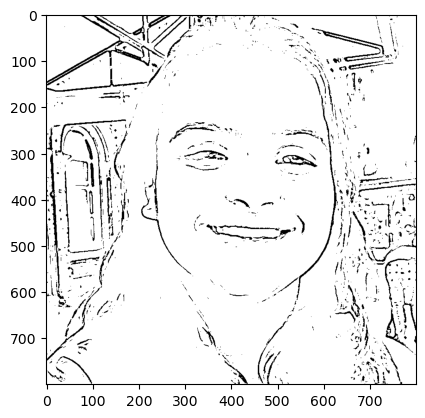

In [77]:
line_size, blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value)


plt.imshow(edges, cmap = "gray")
plt.show()

## Reduce the Color Palette

In [78]:
def color_quantization(img, k):
    #tranform the image
    data = np.float32(img).reshape((-1,3))


    #Determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    #Implementing k-Means clustering
    ret, lable, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS )
    center = np.uint8(center)

    result = center[lable.flatten()]
    result = result.reshape(img.shape)

    return result

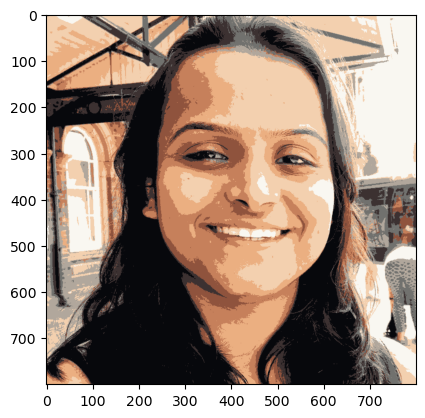

In [79]:
img =  color_quantization(img, k=9)

plt.imshow(img)
plt.show()

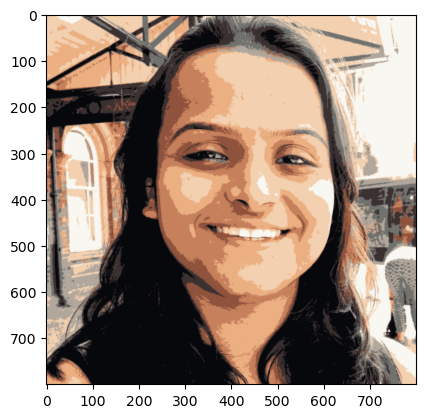

In [80]:
# Reduce the noise

blurred = cv2.bilateralFilter(img, d=3, sigmaColor = 200, sigmaSpace = 200)

plt.imshow(blurred)
plt.show()


# Combine Edge Mask with the quantiz img

In [83]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)


    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()

    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()

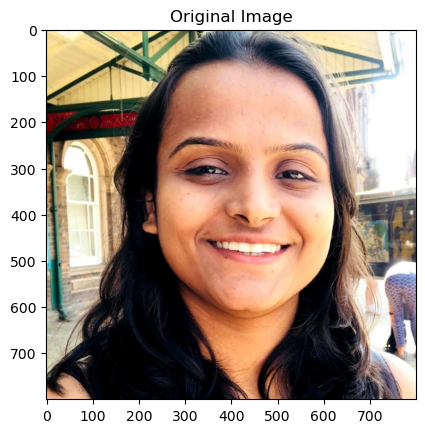

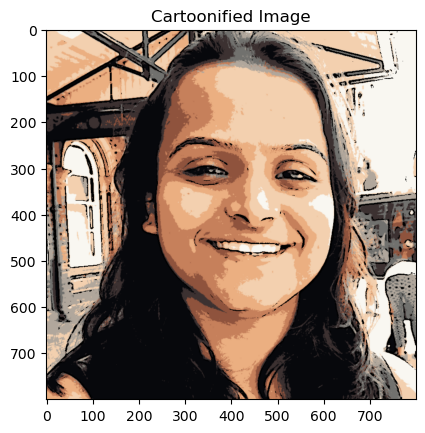

In [84]:
cartoon()